## Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.



1. **make_model:** Contains the make and model information of the vehicles.
2. **body_type:** Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price:** Contains the price information of the vehicles.
4. **vat:** Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km:** Contains the mileage information of the vehicles.
6. **type:** Indicates the type of the vehicle (e.g., new, used).
7. **fuel:** Indicates the type of fuel used (e.g., petrol, diesel).
8. **gears:** Contains the number of gears in the vehicles.
9. **comfort_convenience:** Contains the comfort and convenience features of the vehicles.
10. **entertainment_media:** Contains entertainment and media features.
11. **extras:** Contains the extra features of the vehicles.
12. **safety_security:** Contains safety features.
13. **age:** The age of the vehicles.
14. **previous_owners:** Contains the number of previous owners of the vehicles.
15. **hp_kw:** Contains the horsepower of the vehicles in kilowatts.
16. **inspection:** Contains information about whether the vehicle has a new inspection.
17. **paint_type:** Contains the type of paint of the vehicles.
18. **upholstery_type:** Contains the type of upholstery in the vehicles.
19. **gearing_type:** Indicates the type of transmission in the vehicles.
20. **cc:** Indicates the engine displacement in cubic centimeters (cc).
21. **weight_kg:** Indicates the weight of the vehicles in kilograms.
22. **drive_chain:** Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb:** Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.



# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
%matplotlib inline
#%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)

import scipy.stats as stats
import inflection
from skimpy import clean_columns
import missingno as msno
import plotly.graph_objects as go
from scipy.stats import skew

In [13]:
df = pd.read_csv("final_scout_not_dummy.csv")
df

make_model body_type  price               vat            km  \
0             Audi A1    Sedans  15770    VAT deductible  56013.000000   
1             Audi A1    Sedans  14500  Price negotiable  80000.000000   
2             Audi A1    Sedans  14640    VAT deductible  83450.000000   
3             Audi A1    Sedans  14500    VAT deductible  73000.000000   
4             Audi A1    Sedans  16790    VAT deductible  16200.000000   
...               ...       ...    ...               ...           ...   
15910  Renault Espace       Van  39950    VAT deductible   1647.362609   
15911  Renault Espace       Van  39885    VAT deductible   9900.000000   
15912  Renault Espace       Van  39875    VAT deductible     15.000000   
15913  Renault Espace       Van  39700    VAT deductible     10.000000   
15914  Renault Espace       Van  40999    VAT deductible   1647.362609   

                 Type     Fuel  Gears  \
0                Used   Diesel    7.0   
1                Used  Benzine    7.0   
2                Used   Diesel    7.0   
3                Used   Diesel    6.0   
4                Used   Diesel    7.0   
...               ...      ...    ...   
15910             New   Diesel    6.0   
15911            Used  Benzine    7.0   
15912  Pre-registered   Diesel    6.0   
15913  Pre-registered   Diesel    6.0   
15914   Demonstration  Benzine    6.0   

                                     Comfort_Convenience  \
0      Air conditioning,Armrest,Automatic climate con...   
1      Air conditioning,Automatic climate control,Hil...   
2      Air conditioning,Cruise control,Electrical sid...   
3      Air suspension,Armrest,Auxiliary heating,Elect...   
4      Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
15910  Air conditioning,Automatic climate control,Cru...   
15911  Air conditioning,Automatic climate control,Cru...   
15912  Air conditioning,Armrest,Automatic climate con...   
15913  Air conditioning,Automatic climate control,Cru...   
15914  Air conditioning,Automatic climate control,Cru...   

                                     Entertainment_Media  \
0      Bluetooth,Hands-free equipment,On-board comput...   
1      Bluetooth,Hands-free equipment,On-board comput...   
2                                  MP3,On-board computer   
3      Bluetooth,CD player,Hands-free equipment,MP3,O...   
4      Bluetooth,CD player,Hands-free equipment,MP3,O...   
...                                                  ...   
15910  Bluetooth,Digital radio,Hands-free equipment,O...   
15911  Bluetooth,Digital radio,Hands-free equipment,R...   
15912  Bluetooth,Hands-free equipment,On-board comput...   
15913                  Bluetooth,Digital radio,Radio,USB   
15914                                                USB   

                                                  Extras  \
0         Alloy wheels,Catalytic Converter,Voice Control   
1      Alloy wheels,Sport seats,Sport suspension,Voic...   
2                             Alloy wheels,Voice Control   
3                 Alloy wheels,Sport seats,Voice Control   
4      Alloy wheels,Sport package,Sport suspension,Vo...   
...                                                  ...   
15910                          Alloy wheels,Touch screen   
15911            Alloy wheels,Touch screen,Voice Control   
15912                                       Alloy wheels   
15913                          Alloy wheels,Touch screen   
15914                          Alloy wheels,Touch screen   

                                         Safety_Security  age  \
0      ABS,Central door lock,Daytime running lights,D...  3.0   
1      ABS,Central door lock,Central door lock with r...  2.0   
2      ABS,Central door lock,Daytime running lights,D...  3.0   
3      ABS,Alarm system,Central door lock with remote...  3.0   
4      ABS,Central door lock,Driver-side airbag,Elect...  3.0   
...                                                  ...  ...   
15910  ABS,

In [14]:
df.shape

(15915, 23)

In [15]:
df.rename(columns={"make_model" : "model",
                   "Inspection_new" : "inspection",
                   "Displacement_cc" : "cc"}, inplace=True)

In [16]:
df.columns = df.columns.str.lower()
df.columns

Index(['model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel', 'gears',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kw', 'inspection',
       'paint_type', 'upholstery_type', 'gearing_type', 'cc', 'weight_kg',
       'drive_chain', 'cons_comb'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   model                15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   type                 15915 non-null  object 
 6   fuel                 15915 non-null  object 
 7   gears                15915 non-null  float64
 8   comfort_convenience  15915 non-null  object 
 9   entertainment_media  15915 non-null  object 
 10  extras               15915 non-null  object 
 11  safety_security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  previous_owners      15915 non-null  float64
 14  hp_kw                15915 non-null  float64
 15  inspection           15915 non-null 

In [18]:
# Veri setindeki yinelenen gözlemleri kontrol eder ve bunları kaldırır

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [19]:
duplicate_values(df)

Duplicate check...
There are 1673 duplicated observations in the dataset.
1673 duplicates were dropped!
No more duplicate rows!


In [20]:
df.describe().T

count          mean           std     min      25%  \
price            14242.0  18100.969457   7421.213772  4950.0  12950.0   
km               14242.0  32582.109593  36856.863207     0.0   3898.0   
gears            14242.0      5.939545      0.702846     5.0      5.0   
age              14242.0      1.415040      1.109537     0.0      0.0   
previous_owners  14242.0      1.040795      0.337413     0.0      1.0   
hp_kw            14242.0     88.713453     26.548219    40.0     66.0   
inspection       14242.0      0.256284      0.436596     0.0      0.0   
cc               14242.0   1432.889763    277.506916   890.0   1229.0   
weight_kg        14242.0   1342.399312    201.246784   840.0   1165.0   
cons_comb        14242.0      4.825183      0.862170     3.0      4.1   

                     50%      75%       max  
price            16950.0  21900.0   74600.0  
km               21000.0  47000.0  317000.0  
gears                6.0      6.0       8.0  
age                  1.0      2.0       3.0  
previous_owners      1.0      1.0       4.0  
hp_kw               85.0    103.0     294.0  
inspection           0.0      1.0       1.0  
cc                1461.0   1598.0    2967.0  
weight_kg         1320.0   1487.0    2471.0  
cons_comb            4.8      5.4       9.1

In [21]:
df.describe(include="object").T

count unique  \
model                14242      9   
body_type            14242      8   
vat                  14242      2   
type                 14242      5   
fuel                 14242      4   
comfort_convenience  14242   6196   
entertainment_media  14242    346   
extras               14242    659   
safety_security      14242   4442   
paint_type           14242      3   
upholstery_type      14242      2   
gearing_type         14242      3   
drive_chain          14242      3   

                                                                   top   freq  
model                                                          Audi A3   2758  
body_type                                                       Sedans   7230  
vat                                                     VAT deductible  13426  
type                                                              Used  10172  
fuel                                                           Benzine   7558  
comfort_convenience  Air conditioning,Electrical side mirrors,Hill ...    312  
entertainment_media  Bluetooth,Hands-free equipment,On-board comput...   1562  
extras                                                    Alloy wheels   5010  
safety_security      ABS,Central door lock,Daytime running lights,D...    635  
paint_type                                                    Metallic  13682  
upholstery_type                                                  Cloth  10918  
gearing_type                                                    Manual   7232  
drive_chain                                                      front  14067

In [22]:
df.isnull().sum()

model                  0
body_type              0
price                  0
vat                    0
km                     0
type                   0
fuel                   0
gears                  0
comfort_convenience    0
entertainment_media    0
extras                 0
safety_security        0
age                    0
previous_owners        0
hp_kw                  0
inspection             0
paint_type             0
upholstery_type        0
gearing_type           0
cc                     0
weight_kg              0
drive_chain            0
cons_comb              0
dtype: int64

In [23]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

count  percentage
model                    0         0.0
body_type                0         0.0
price                    0         0.0
vat                      0         0.0
km                       0         0.0
type                     0         0.0
fuel                     0         0.0
gears                    0         0.0
comfort_convenience      0         0.0
entertainment_media      0         0.0
extras                   0         0.0
safety_security          0         0.0
age                      0         0.0
previous_owners          0         0.0
hp_kw                    0         0.0
inspection               0         0.0
paint_type               0         0.0
upholstery_type          0         0.0
gearing_type             0         0.0
cc                       0         0.0
weight_kg                0         0.0
drive_chain              0         0.0
cons_comb                0         0.0

In [24]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

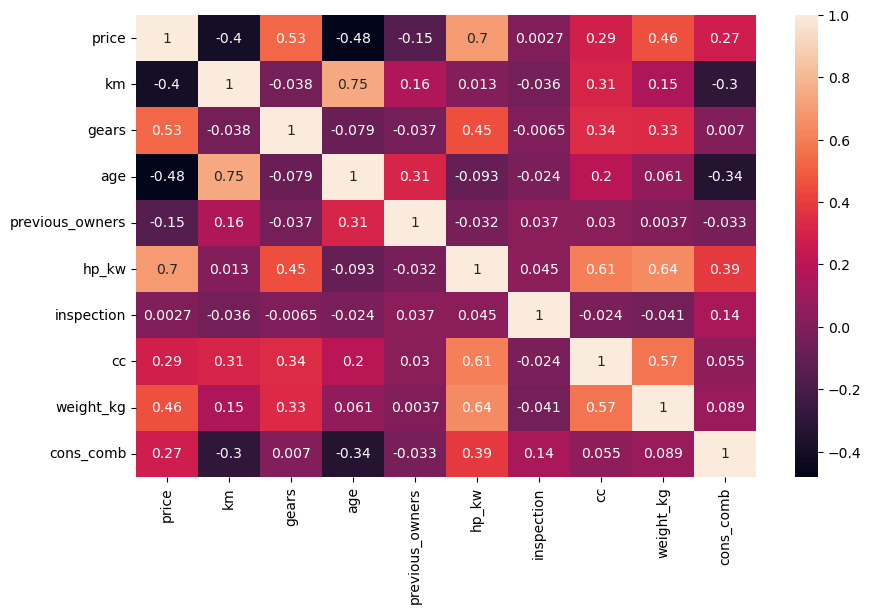

In [25]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [26]:
def color_red_val(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'white'
    return f' color:{color}'

In [27]:
pd.DataFrame(df).corr(numeric_only = True).style.applymap(color_red_val)

In [28]:
df.sort_values(by="price", ascending=False)

model    body_type  price             vat        km  \
3648          Audi A3       Sedans  74600  VAT deductible   13000.0   
15822  Renault Espace          Van  68320  VAT deductible    4307.0   
3649          Audi A3      Compact  67600  VAT deductible   37747.0   
3587          Audi A3       Sedans  64900  VAT deductible   35000.0   
15824  Renault Espace          Van  64332  VAT deductible       1.0   
...               ...          ...    ...             ...       ...   
13766    Renault Clio       Sedans   5445  VAT deductible  123000.0   
8822       Opel Corsa      Compact   5300  VAT deductible  173021.0   
8824       Opel Corsa  Transporter   5250  VAT deductible   80000.0   
8823       Opel Corsa      Compact   4990  VAT deductible   79000.0   
8825       Opel Corsa       Sedans   4950  VAT deductible  179521.0   

                type     fuel  gears  \
3648            Used  Benzine    7.0   
15822  Demonstration   Diesel    7.0   
3649            Used  Benzine    7.0   
3587            Used  Benzine    7.0   
15824            New  Benzine    6.0   
...              ...      ...    ...   
13766           Used   Diesel    5.0   
8822            Used   Diesel    5.0   
8824            Used   Diesel    5.0   
8823            Used  Benzine    5.0   
8825            Used   Diesel    5.0   

                                     comfort_convenience  \
3648   Air conditioning,Armrest,Automatic climate con...   
15822  Air conditioning,Armrest,Automatic climate con...   
3649   Air conditioning,Armrest,Automatic climate con...   
3587   Air conditioning,Seat ventilation,Split rear s...   
15824  Air conditioning,Armrest,Automatic climate con...   
...                                                  ...   
13766                                   Air conditioning   
8822   Air conditioning,Electrical side mirrors,Navig...   
8824   Air conditioning,Electrical side mirrors,Multi...   
8823   Air conditioning,Cruise control,Electrical sid...   
8825   Air conditioning,Automatic climate control,Ele...   

                                     entertainment_media  \
3648                   CD player,On-board computer,Radio   
15822  Bluetooth,CD player,Digital radio,Hands-free e...   
3649                   CD player,On-board computer,Radio   
3587                                               Radio   
15824           Digital radio,Hands-free equipment,Radio   
...                                                  ...   
13766                                              Radio   
8822                         CD player,On-board computer   
8824                                 Bluetooth,Radio,USB   
8823   Bluetooth,Hands-free equipment,On-board comput...   
8825       Bluetooth,CD player,MP3,On-board computer,USB   

                                                  extras  \
3648           Alloy wheels,Sport seats,Sport suspension   
15822                             Alloy wheels,Roof rack   
3649   Alloy wheels,Roof rack,Sport seats,Sport suspe...   
3587                                        Alloy wheels   
15824                         Alloy wheels,Voice Control   
...                                                  ...   
13766                                       Alloy wheels   
8822                                        Alloy wheels   
8824                    Alloy wheels,Catalytic Converter   
8823                           Alloy wheels,Touch screen   
8825                                        Alloy wheels   

                                         safety_security  age  \
3648   ABS,Alarm system,Central door lock,Driver-side...  1.0   
15822  ABS,Adaptive Cruise Control,Adaptive headlight...  0.0   
3649   ABS,Alarm system,Central door lock,Driver-side...  2.0   
3587   Adaptive Cruise Control,Alarm system,Central d...  1.0   
15824  ABS,Alarm system,Blind spot monitor,Daytime ru...  0.0   
...                                                  ...  ...   
13766              Central door lock with remote control  3.0   

In [29]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

model               : 9
body_type           : 8
vat                 : 2
type                : 5
fuel                : 4
comfort_convenience : 6196
entertainment_media : 346
extras              : 659
safety_security     : 4442
paint_type          : 3
upholstery_type     : 2
gearing_type        : 3
drive_chain         : 3


In [30]:
df.model.value_counts()

model
Audi A3           2758
Opel Insignia     2417
Audi A1           2377
Opel Astra        2305
Opel Corsa        1994
Renault Clio      1486
Renault Espace     884
Renault Duster      20
Audi A2              1
Name: count, dtype: int64

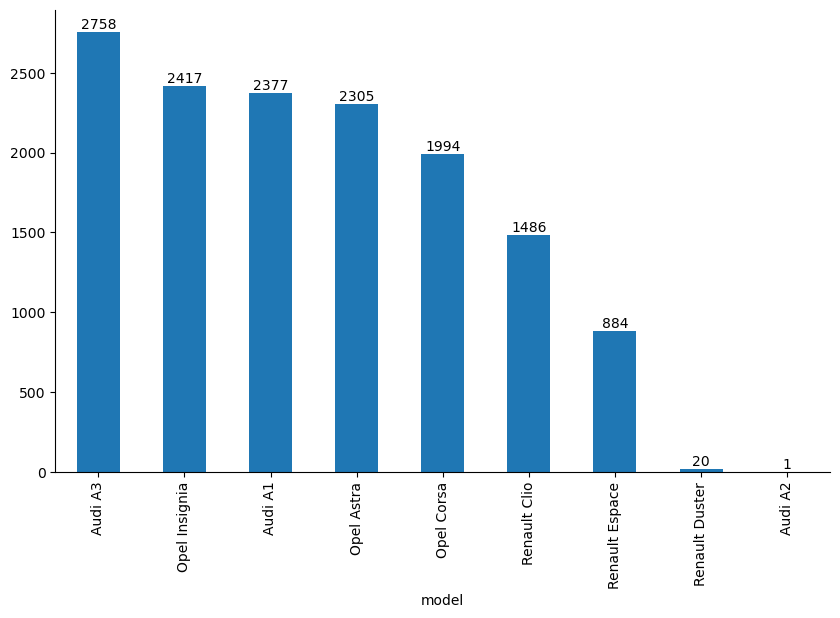

In [31]:
# Bu kod, DataFrame'deki "make_model" sütunundaki unique değerlerin sayısını hesaplar
# ve bu sayıları bar grafikte görselleştirir.

ax = df.model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
    
ax.bar_label(ax.containers[0]);

# for p in ax.patches:
#     ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [32]:
df[df.model=="Audi A2"]

model body_type  price             vat       km            type  \
2614  Audi A2  Off-Road  28200  VAT deductible  26166.0  Employee's car   

        fuel  gears                                comfort_convenience  \
2614  Diesel    6.0  Air conditioning,Armrest,Automatic climate con...   

                                    entertainment_media        extras  \
2614  Bluetooth,CD player,Hands-free equipment,MP3,O...  Alloy wheels   

                                        safety_security  age  previous_owners  \
2614  ABS,Adaptive Cruise Control,Central door lock,...  1.0              1.0   

      hp_kw  inspection paint_type upholstery_type gearing_type      cc  \
2614   85.0           0   Metallic           Cloth       Manual  1598.0   

      weight_kg drive_chain  cons_comb  
2614     1135.0       front        4.9

In [33]:
df.drop(index=[2614], inplace=True)

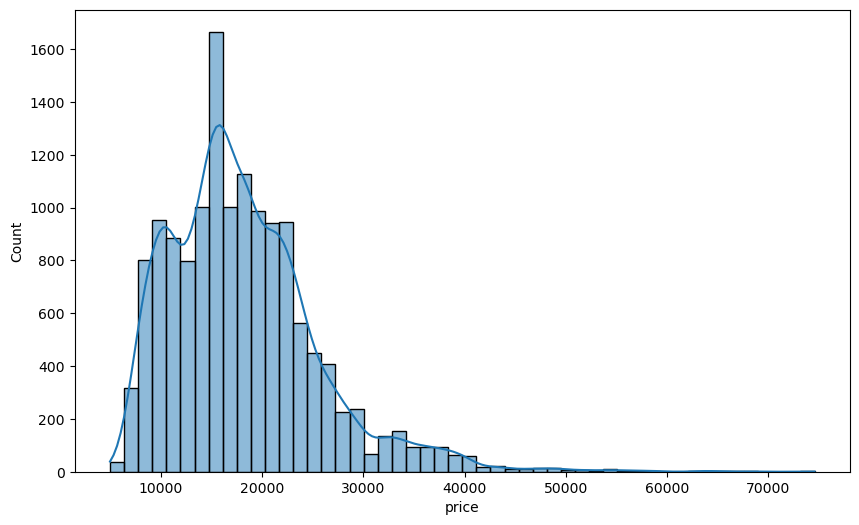

In [35]:
sns.histplot(df.price, bins=50, kde=True);

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [40]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

numeric_df = df.select_dtypes(include=[np.number])

numeric_df.corr().style.applymap(color_correlation1)

In [41]:
def color_red(val):
    if val > 0.60 and val < 0.99:
        color = 'red'
    elif val>=1:
        color = "yellowgreen"
    else:
        color = 'white'
    return f'background-color: {color}'
pd.DataFrame(corr).style.applymap(color_red)

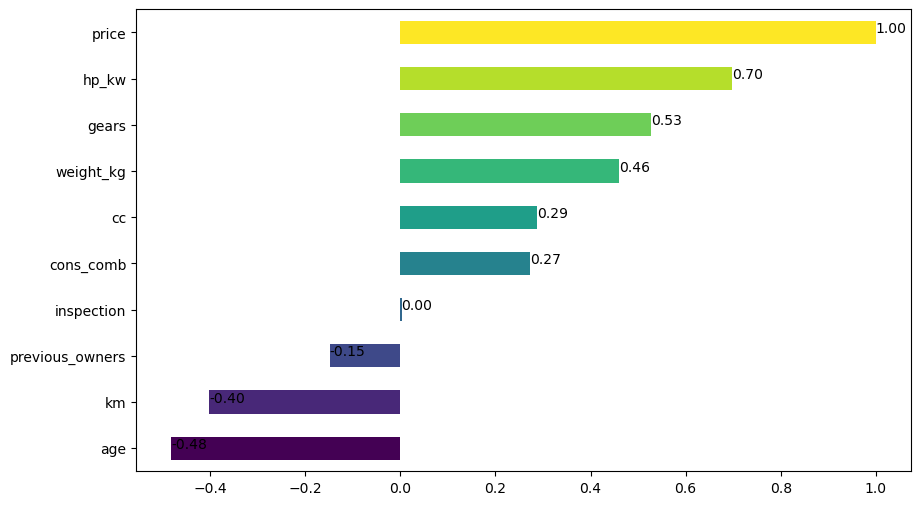

In [42]:
corr_values = numeric_df.corr()["price"].sort_values()
colors = plt.cm.viridis(np.linspace(0, 1, len(corr_values)))

ax = corr_values.plot.barh(color=colors)
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

## Get Dummies

In [43]:
# Bu kod, sütunlarımızdaki her bir hücrede yer alan virgülle ayrılmış metinleri ayrıştırarak,
# bu metinlerin her bir öğesinin ayrı bir sütun olarak temsil edildiği yeni bir veri çerçevesi oluşturur.

df = df.join(df["comfort_convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
df = df.join(df["entertainment_media"].str.get_dummies(sep = ",").add_prefix("em_"))
df = df.join(df["extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
df = df.join(df["safety_security"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [44]:
df.drop(["comfort_convenience","entertainment_media","extras","safety_security"], axis=1, inplace=True)

In [45]:
df = pd.get_dummies(df, drop_first =True)

# drop_first=True parametresi, her bir özelliğin ilk kategorisine ait sütunu kaldırır. 
# Bu, overfitting ve multicollinarity önlemek için yapılır.

# Örneğin, "Fuel_Type" sütununda "Diesel", "Gasoline" ve "LPG" gibi üç kategori varsa, sütunlardan sadece ikisi
# (örneğin "Gasoline" ve "LPG") kodlanır ve "Diesel" kategorisi için referans olarak kullanılır.
# Bu sayede, "Gasoline" sütunu ve "LPG" sütunu, "Diesel" sütunu ile ilişkilendirilir ve herhangi bir çoklu doğrusal
# bağımsızlık sorununun önlenmesi sağlanır.
# Pandas versiyon farkından kaynaklı True/False yerine 0/1 olarak görüntülenebilir

In [48]:
# DataFrame'indeki boolean değerleri integer'a dönüştürür

bool_columns = df.columns[df.dtypes == 'bool']
df[bool_columns] = df[bool_columns].astype(int)

In [47]:
df.sample(10)

price             km  gears  age  previous_owners  hp_kw  inspection  \
6395    6999  146404.000000    6.0  3.0              1.0   81.0           0   
4233   18799   30839.000000    6.0  2.0              1.0   85.0           0   
14917  12000    1647.362609    6.0  0.0              0.0   81.0           0   
7464   14660   15447.000000    6.0  1.0              1.0   81.0           0   
15164  21990   66205.000000    6.0  3.0              1.0  118.0           0   
3556   15880   54200.000000    6.0  3.0              1.0   81.0           1   
2466   22990    1647.362609    5.0  0.0              1.0   70.0           0   
3481   15790   87000.000000    6.0  2.0              1.0   81.0           0   
14180   9800   55000.000000    5.0  2.0              1.0   55.0           0   
5847   15490   39750.000000    6.0  3.0              1.0  110.0           1   

           cc  weight_kg  cons_comb  cc_Air conditioning  cc_Air suspension  \
6395   1598.0     1425.0        4.5                    1                  0   
4233   1598.0     1360.0        4.0                    1                  0   
14917  1600.0     1163.0        4.8                    1                  0   
7464   1598.0     1425.0        3.5                    1                  0   
15164  1598.0     1659.0        4.7                    1                  0   
3556   1598.0     1260.0        4.0                    1                  0   
2466    999.0     1180.0        4.7                    1                  0   
3481   1598.0     1365.0        4.2                    1                  0   
14180  1461.0     1260.0        3.3                    0                  0   
5847   1399.0     1350.0        5.4                    1                  0   

       cc_Armrest  cc_Automatic climate control  cc_Auxiliary heating  \
6395            0                             1                     0   
4233            0                             1                     0   
14917           0                             0                     0   
7464            1                             1                     0   
15164           0                             1                     0   
3556            1                             0                     0   
2466            1                             1                     0   
3481            0                             0                     0   
14180           0                             0                     0   
5847            1                             1                     0   

       cc_Cruise control  cc_Electric Starter  cc_Electric tailgate  \
6395                   1                    0                     0   
4233                   0                    0                     0   
14917                  0                    0                     0   
7464                   1                    0                     0   
15164                  1                    0                     0   
3556                   1                    0                     0   
2466                   1                    0                     0   
3481                   0                    0                     0   
14180                  1                    0                     0   
5847                   1                    0                     0   

       cc_Electrical side mirrors  cc_Electrically adjustable seats  \
6395                            1                                 0   
4233                            0                                 0   
14917                           1                                 0   
7464                            1                                 0   
15164                           1                                 1   
3556                            1                                 0   
2466                            1                                 0   
3481                            1                                 0   
14180                           0         

In [49]:
df.shape

(14241, 133)

In [50]:
from ydata_profiling import ProfileReport

In [ ]:
pr_df = ProfileReport(df)
pr_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

## Feature Importance 

## 7. Visually Compare Models Performance In a Graph

## Prediction new observation

## random state=42

# !! (Dont forget Grid-Search)!!





# Congratulations

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Modelling_Auto_Scout_Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |